In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep="\t")

In [3]:
df2=pd.read_csv("zippedData/rt.reviews.tsv.gz", sep="\t", encoding='latin-1')

In [4]:
#df.iloc[30:50]
df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
df2.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
df=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [7]:
df.production_budget=df.production_budget.apply(lambda x: x.strip('$'))

In [8]:
df.production_budget=df.production_budget.replace({",":''}, regex=True).apply(pd.to_numeric)

In [9]:
df.domestic_gross=df.domestic_gross.apply(lambda x: x.strip('$'))
df.domestic_gross=df.domestic_gross.replace({",":''}, regex=True).apply(pd.to_numeric)

In [10]:
df.worldwide_gross=df.worldwide_gross.apply(lambda x: x.strip('$'))
df.worldwide_gross=df.worldwide_gross.replace({",":''}, regex=True).apply(pd.to_numeric)

In [11]:
df['domestic_profit']=df.domestic_gross-df.production_budget

In [12]:
df['worldwide_profit']=df.worldwide_gross-df.production_budget

In [13]:
df.release_date=pd.to_datetime(df.release_date)

In [14]:
df['release_month_year'] = df['release_date'].dt.to_period('Y')

In [15]:
bydates=df.sort_values(by = 'release_date')
low_cutoff=pd.to_datetime('1980')
high_cutoff=pd.to_datetime('06/06/2019')
bydate_temp=bydates.loc[(bydates.release_date >low_cutoff)&(bydates.release_date<high_cutoff)]

In [16]:
bydate=bydate_temp.loc[bydates.domestic_gross!=0]
bydate.shape

(4975, 9)

In [17]:
df2=bydate.groupby('release_month_year').mean().reset_index()

In [23]:
ww_normed=(df2.worldwide_profit-df2.domestic_profit)/(df2.worldwide_profit)

In [24]:
dom_normed=df2.domestic_profit/df2.worldwide_profit

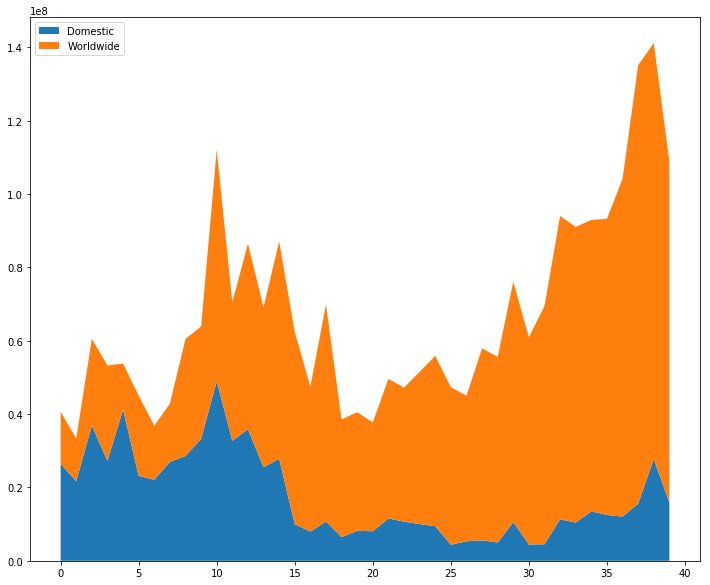

In [22]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters

#percent or total profit
x=df2.index
y=[df2.domestic_profit, (df2.worldwide_profit-df2.domestic_profit)]


 
    
# Plot
plt.figure(figsize=(12,10))
plt.stackplot(x,y, labels=['Domestic','Worldwide'])
plt.legend(loc='upper left')

plt.show()


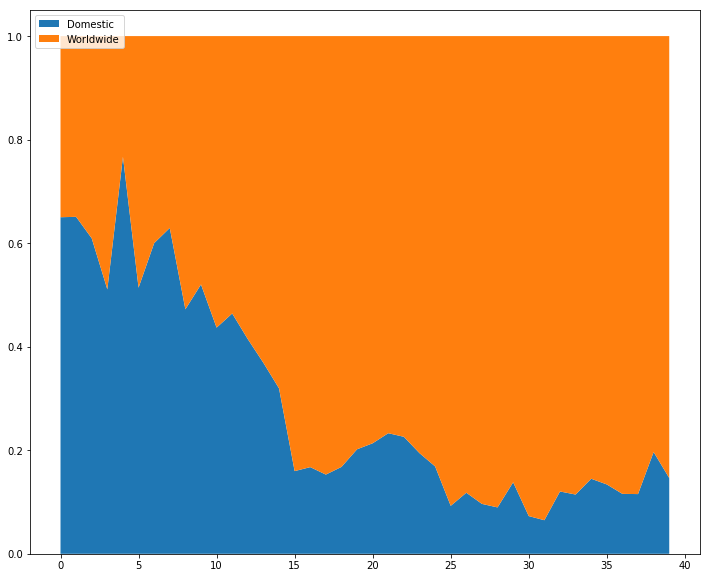

In [25]:

#percent or total profit
x=df2.index
y=[dom_normed, ww_normed]


 
    
# Plot
plt.figure(figsize=(12,10))
plt.stackplot(x,y, labels=['Domestic','Worldwide'])
plt.legend(loc='upper left')

plt.show()
